<a href="https://colab.research.google.com/github/Sherif-Elfiky/CSE151AProj/blob/main/151AProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/Sherif-Elfiky/CSE151AProj.git

Cloning into 'CSE151AProj'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 5.32 MiB | 2.18 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
data = pd.read_csv('CSE151AProj/historical_data.csv')
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


**Convert String times to actual times**

In [17]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])



In [13]:
data

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery time
0,1.0,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2956,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07
197424,1.0,2956,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23
197425,1.0,2956,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08
197426,1.0,3630,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07


In [18]:
data['delivery time'] = pd.to_datetime(data['actual_delivery_time']) - pd.to_datetime(data['created_at'])


In [ ]:
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07


In [19]:
data = data.drop(columns=['actual_delivery_time', 'created_at'])

In [9]:
data

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery time
0,1.0,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2956,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07
197424,1.0,2956,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23
197425,1.0,2956,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08
197426,1.0,3630,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07


There seems to be very heavy correlations between the amount of dashers that are actually availale and the wait time.

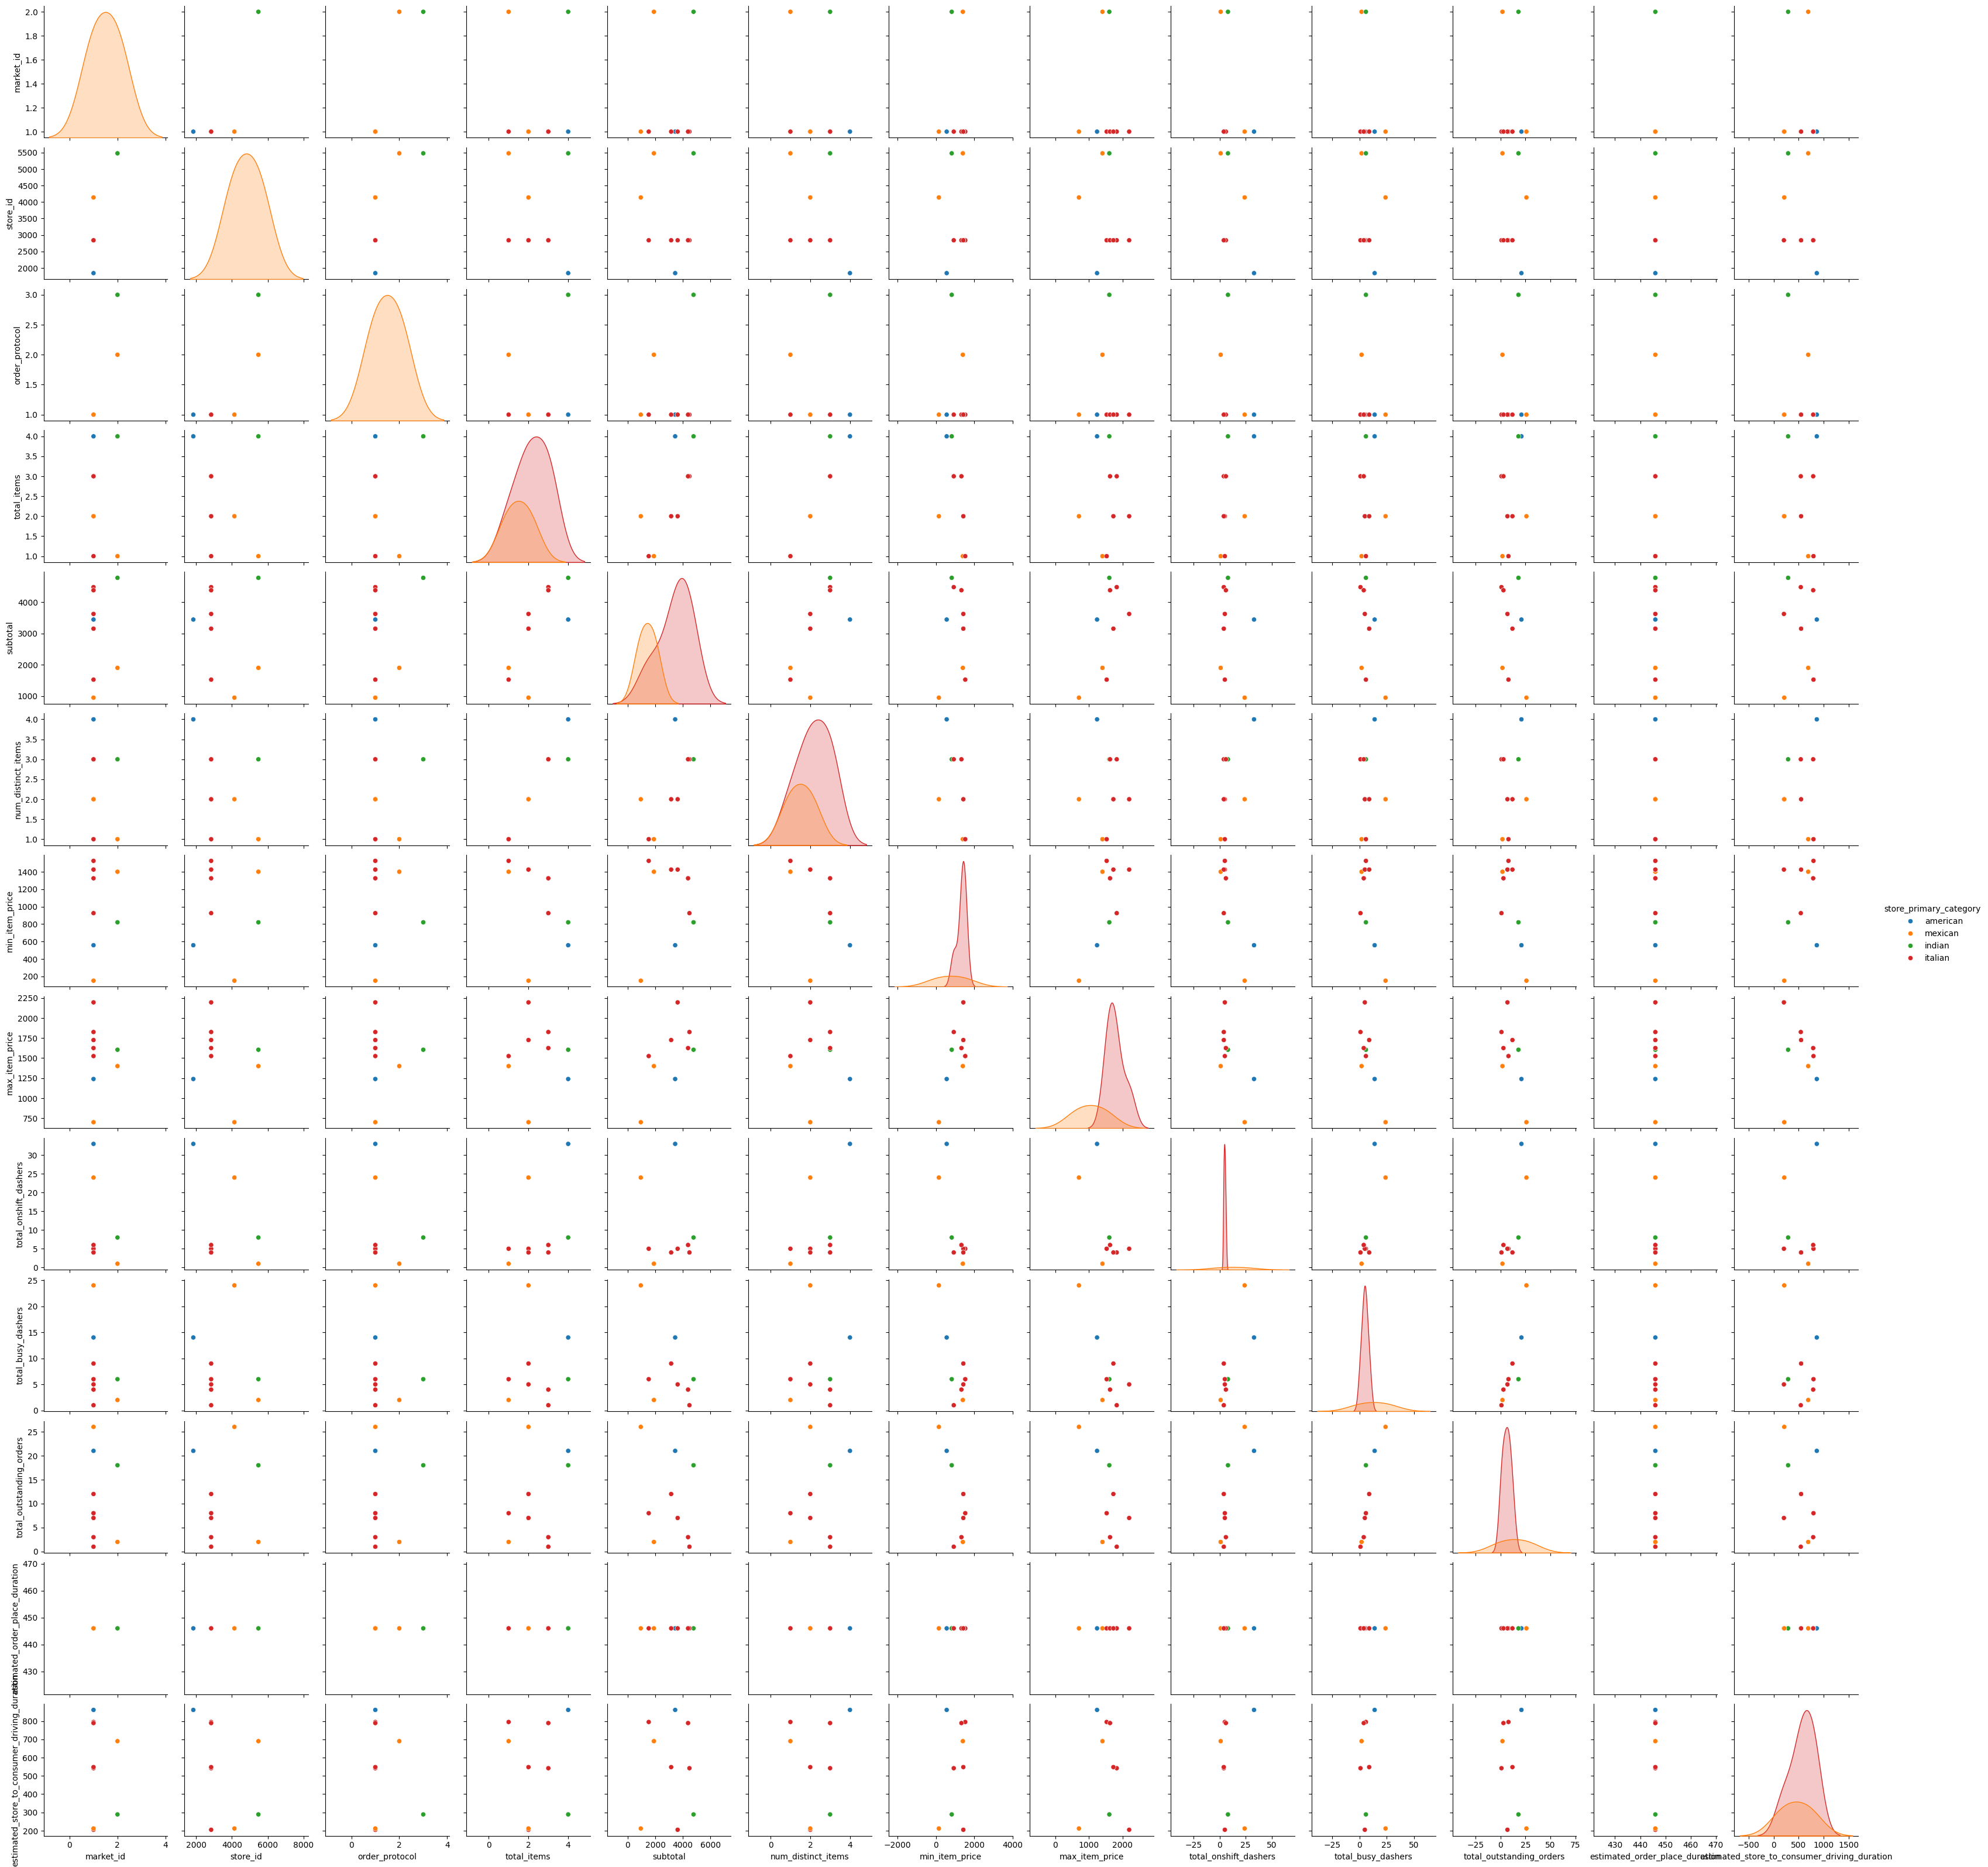

In [21]:
sns.pairplot(data.head(20), hue = 'store_primary_category')

In [22]:
data = data.drop(columns=['store_primary_category'])

<Axes: >

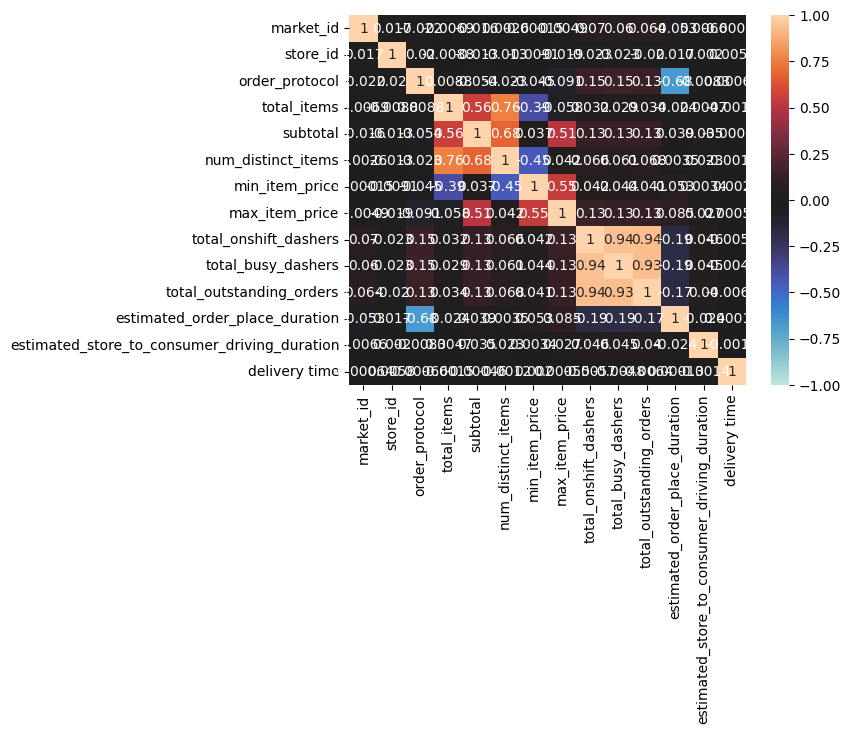

In [23]:
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0)